<a href="https://colab.research.google.com/github/bendicsekb/embedded/blob/master/birHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SHOW_PLOTS = False

#1. Feladat


In [ ]:
p1 = 4
p2 = 7
p3 = 0

#1.1

In [ ]:
def create_tasks(verbose=True):
  task1 = {
      "T": 8*p1,
      "C": 2*p1,
      "T0": 0,
      "priority": 1,
      "done": False,
      "left": 2*p1,
      "name": 'task1',
      "arrivals": [0, 0+8*p1],
      "start_times": [],
      "end_times": []
  }
  task2 = {
      "T": 16*p1,
      "C": 2*p1,
      "T0": p2*p1,
      "priority": 2,
      "done": True,
      "left": 2*p1,
      "name": 'task2',
      "arrivals": [p2*p1, p2*p1+16*p1],
      "start_times": [],
      "end_times": []
  }
  task3 = {
      "T": 32*p1,
      "C": 8*p1,
      "T0": p3*p1,
      "priority": 3,
      "done": False,
      "left": 8*p1,
      "name": 'task3',
      "arrivals": [p3*p1, p3*p1+32*p1],
      "start_times": [],
      "end_times": []
  }
  scheduler = {
      "T": 1,
      "C": 0.1,
      "T0": 0,
      "priority": 0,
      "done": False,
      "left": 0.1,
      "name": 'scheduler',
      "arrivals": [0],
      "start_times": [],
      "end_times": []
  }
  if verbose:
    print(f'\n{task1["name"]}\t\tT: {task1["T"]}\tC: {task1["C"]}\tT0: {task1["T0"]}')
    print(f'{task2["name"]}\t\tT: {task2["T"]}\tC: {task2["C"]}\tT0: {task2["T0"]}')
    print(f'{task3["name"]}\t\tT: {task3["T"]}\tC: {task3["C"]}\tT0: {task3["T0"]}')
    print(f'{scheduler["name"]}\tT: {scheduler["T"]}\tC: {scheduler["C"]}\tT0: {scheduler["T0"]}\n')
  return task1, task2, task3, scheduler

In [ ]:
import numpy as np

def exc1_1(task1, task2, task3, scheduler):
  current_task = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"]])
  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"]:
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)


    # run the scheduler
    scheduling.append(
        [ms, round(ms+scheduler["C"], 1), scheduler["name"]]
    )
    curr_time = round(ms+scheduler["C"], 1)
    time_to_execute = round(1 - scheduler["C"], 1)
    scheduler["start_times"].append(ms)
    scheduler["end_times"].append(curr_time)

    # run one of the tasks and update 
    ran_task = False
    for task in [task1, task2, task3]:
      if not task["done"]:
        task_left = task["left"]
        if current_task != task["name"]:
          task["start_times"].append(curr_time)
          for last_task in [task1, task2, task3]:
            if last_task["name"] == current_task:
              last_task["end_times"].append(ms)
              break
          current_task = task["name"]
        
        task["left"] = round(task_left - time_to_execute, 1)
        if task["left"] < epsilon:
          task["done"] = True
          task["left"] = task["C"]
          task["end_times"].append(round(curr_time + task_left, 1))
          current_task = None
          if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
            unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
            unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
        
        scheduling.append(
        [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
        )
        ran_task = True
        
        break
      
    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))

  return interval_end, scheduler, task1, task2, task3, unused_time, unused_times


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_scheduling(SHOW_PLOTS, fig_name, task1, task2, task3, scheduler):
  fig, ax = plt.subplots()
  fig.set_size_inches(40, 5)
  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task1["start_times"], task1["end_times"])], (10, 5), facecolors='blue')
  ax.broken_barh([(a, .2) for a in task1["arrivals"] ], (10, 3), facecolors='magenta')

  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task2["start_times"], task2["end_times"])], (5, 5), facecolors='yellow')
  ax.broken_barh([(a, .2) for a in task2["arrivals"] ], (5, 3), facecolors='magenta')

  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task3["start_times"], task3["end_times"])], (0, 5), facecolors='green')
  ax.broken_barh([(a, .2) for a in task3["arrivals"] ], (0, 3), facecolors='magenta')

  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(scheduler["start_times"], scheduler["end_times"])], (15, 5), facecolors='red')
  if len(scheduler["arrivals"]) > 0:
    ax.broken_barh([(a, .2) for a in scheduler["arrivals"] ], (15, 3), facecolors='magenta')
  
  ax.set_xlabel('ms')
  ax.set_xticks([e for e in range(0, 131, 5)])
  ax.set_yticks([0, 5, 10, 15])
  ax.set_yticklabels([task3['name'], task2['name'], task1['name'], scheduler['name']])
  ax.grid(True)
  if SHOW_PLOTS:
    plt.show()
  else:
    plt.savefig(f"figure_{fig_name}.png", dpi=300)

In [ ]:
def evaluate_exc(exc_num, exc, create_tasks, constant_scheduler=True):
  print(f'Evaluating excercise: {exc_num}')
  interval_end, scheduler, task1, task2, task3, unused_time, unused_times = exc(*create_tasks())
  print(f'Found scheduling for repeating sequence with period {interval_end}(ms)')
  all_scheduler_times = [(round(s, 1), round(e, 1)) for s,e in zip(scheduler["start_times"], scheduler["end_times"])] 
  scheduler_times =  [all_scheduler_times[0:4], '...', all_scheduler_times[-4:]] if constant_scheduler else all_scheduler_times
  print(scheduler["name"], *scheduler_times)
  for task in [task1, task2, task3]:
    print(task["name"], [(round(s, 1), round(e, 1)) for s,e in zip(task["start_times"], task["end_times"])])
  show_scheduling(SHOW_PLOTS, exc_num, task1, task2, task3,scheduler)
  print(f'CPU idle times (start (ms), end (ms), duration (ms)): {unused_times}')
  print(f'Total idle time: {unused_time}(ms)')
  print(f'CPU utilization: {1- (unused_time / interval_end)}')

Evaluating excercise: 1.1

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0.1	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler [(0, 0.1), (1, 1.1), (2, 2.1), (3, 3.1)] ... [(124, 124.1), (125, 125.1), (126, 126.1), (127, 127.1)]
task1 [(0.1, 8.9), (32.1, 40.9), (64.1, 72.9), (96.1, 104.9)]
task2 [(28.1, 32), (41.1, 45.9), (92.1, 96), (105.1, 109.9)]
task3 [(9.1, 28), (46.1, 62.6)]
CPU idle times (start (ms), end (ms), duration (ms)): [(8.9, 9, 0.1), (40.9, 41, 0.1), (45.9, 46, 0.1), (62.6, 63, 0.4), (63.1, 64, 0.9), (72.9, 73, 0.1), (73.1, 74, 0.9), (74.1, 75, 0.9), (75.1, 76, 0.9), (76.1, 77, 0.9), (77.1, 78, 0.9), (78.1, 79, 0.9), (79.1, 80, 0.9), (80.1, 81, 0.9), (81.1, 82, 0.9), (82.1, 83, 0.9), (83.1, 84, 0.9), (84.1, 85, 0.9), (85.1, 86, 0.9), (86.1, 87, 0.9), (87.1, 88, 0.9), (88.1, 89, 0.9), (89.1, 90, 0.9), (90.1, 91, 0.9), (91.1, 92, 0.9), (104.9, 105, 0.1), (109.9, 110, 0.1), (110.1, 111, 0.9), (111.1,

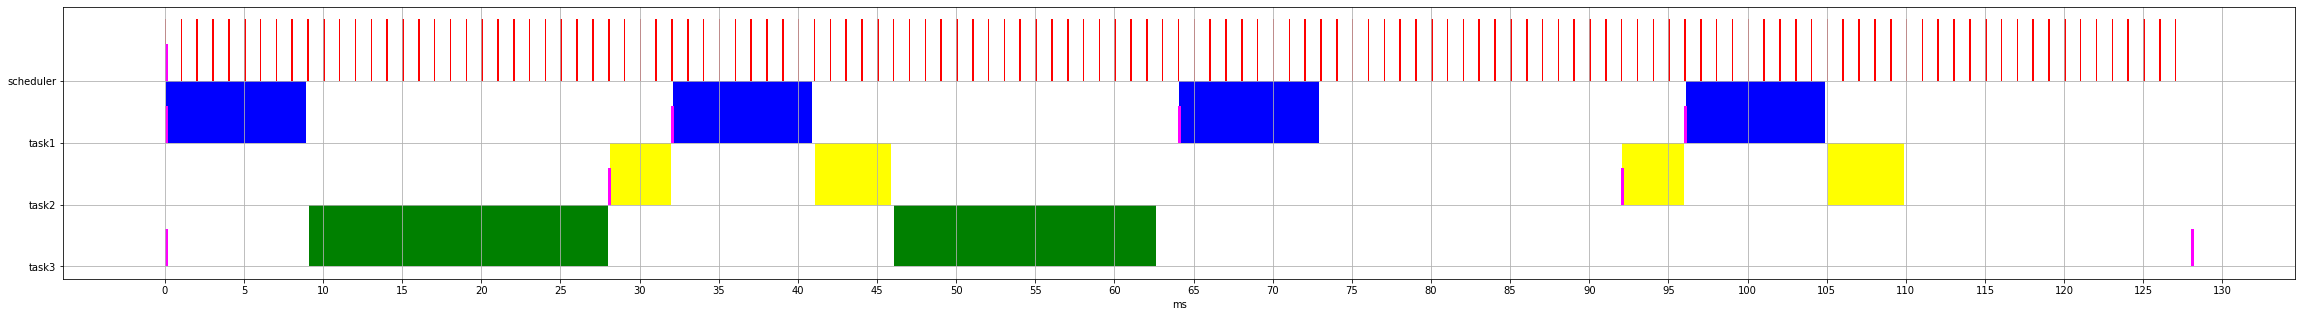

In [ ]:
evaluate_exc("1.1", exc1_1, create_tasks)

#1.2

In [ ]:
def exc1_2(task1, task2, task3, scheduler):
  current_task = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"]])
  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"]:
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)

    curr_time = ms
    time_to_execute = 1

    # run one of the tasks and update 
    ran_task = False
    for task in [task1, task2, task3]:
      if not task["done"]:
        task_left = task["left"]
        # if task_left == task["C"]:
        #   task["start_times"].append(curr_time)
        if current_task != task["name"]:
          # run the scheduler
          scheduling.append(
            [ms, round(ms+scheduler["C"], 1), scheduler["name"]]
          )
          curr_time = round(ms+scheduler["C"], 1)
          time_to_execute = round(1 - scheduler["C"], 1)
          scheduler["start_times"].append(ms)
          scheduler["end_times"].append(curr_time)
          # print("-----", "NEW TASK")
          task["start_times"].append(curr_time)
          for last_task in [task1, task2, task3]:
            if last_task["name"] == current_task:
              last_task["end_times"].append(ms)
              # print("-----", last_task["end_times"])
              break
          current_task = task["name"]
        
        task["left"] = round(task_left - time_to_execute, 1)
        if task["left"] < epsilon:
          task["done"] = True
          task["left"] = task["C"]
          task["end_times"].append(round(curr_time + task_left, 1))
          current_task = None
          if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
            unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
            unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
        
        scheduling.append(
        [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
        )
        ran_task = True
        
        break
      
    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))

  return interval_end, scheduler, task1, task2, task3, unused_time, unused_times

Evaluating excercise: 1.2

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0.1	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler (0, 0.1) (9, 9.1) (28, 28.1) (32, 32.1) (41, 41.1) (46, 46.1) (64, 64.1) (92, 92.1) (96, 96.1) (105, 105.1)
task1 [(0.1, 8.1), (32.1, 40.1), (64.1, 72.1), (96.1, 104.1)]
task2 [(28.1, 32), (41.1, 45.2), (92.1, 96), (105.1, 109.2)]
task3 [(9.1, 28), (46.1, 59.2)]
CPU idle times (start (ms), end (ms), duration (ms)): [(8.1, 9, 0.9), (40.1, 41, 0.9), (45.2, 46, 0.8), (59.2, 60, 0.8), (60, 61, 1), (61, 62, 1), (62, 63, 1), (63, 64, 1), (72.1, 73, 0.9), (73, 74, 1), (74, 75, 1), (75, 76, 1), (76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (104.1, 105, 0.9), (109.2, 110, 0.8), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (

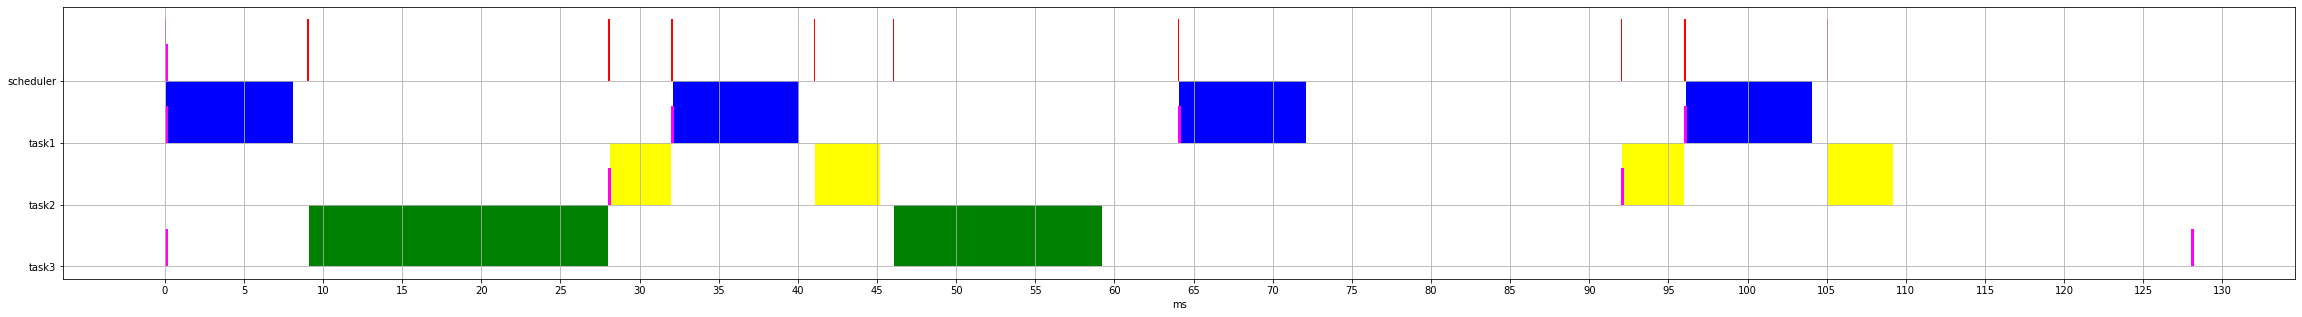

In [ ]:
evaluate_exc("1.2", exc1_2, create_tasks, constant_scheduler=False)

#1.3

In [ ]:
from math import ceil

In [ ]:
def iterate(R, wc_task, hp_tasks):
  sum = 0
  for task in hp_tasks:
    sum = round(sum + (ceil(R / task["T"]) * task["C"]), 1)
  
  R_n_plus_1 = round(wc_task["C"] + sum, 1)
  print(f'{R}\t{sum}\t{wc_task["C"]}\t{R_n_plus_1}')
  return R_n_plus_1

DMA Analysis would calculate the worst case response time iteratively. In our case the scheduler takes a defined time Cs in every period Ts. Let's make things simpler by removing the scheduler task and calculating the ceiling function for every C'i=Ci/(Ts-Cs) for every i-th task.

Taking the ceiling gives the effect that each task can only be started in the next scheduler period.

In [ ]:
def exc1_3(task1, task2, task3, scheduler):
  R = 0
  task1["C"] = ceil(task1["C"] / (scheduler["T"] - scheduler["C"]))
  task2["C"] = ceil(task2["C"] / (scheduler["T"] - scheduler["C"]))
  task3["C"] = ceil(task3["C"] / (scheduler["T"] - scheduler["C"]))

  print('\nR^(n)\tI\tC\tR^(n+1)')
  while True:
    R_n_plus_1 = iterate(R, task3, [task1, task2])
    if R == R_n_plus_1:
      break
    else:
      R = R_n_plus_1
  print(f'Worst case response time of task3: {R}(ms)')


In [ ]:
def evaluate_exc_simple(exc_num, exc, create_tasks):
  print(f'Evaluating excercise: {exc_num}')
  exc(*create_tasks())


In [ ]:
evaluate_exc_simple("1.3", exc1_3, create_tasks)

Evaluating excercise: 1.3

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0.1	T0: 0


R^(n)	I	C	R^(n+1)
0	0	36	36
36	27	36	63
63	27	36	63
Worst case response time of task3: 63(ms)


#1.4

In [ ]:
def get_smallest(queue, current_task):
  if len(queue) < 1:
    return []
  min = 0
  for i in range(len(queue)):
    if queue[i][0] < queue[min][0]:
      min = i
  mins = [element for _, element in enumerate(queue) if queue[min][0] == element[0]]
  same_task = [min for min in mins if min[1]["name"] == current_task]
  return mins[0] if len(same_task) < 1 else same_task[0]

def delete_task_from(queue, taskname):
  for i, elem in enumerate(queue):
    task = elem[1]
    if task["name"] == taskname:
       del queue[i]

In [ ]:
def exc1_4(task1, task2, task3, scheduler):
  current_task = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  task_queue = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"]])

  for task in [task1, task2, task3]:
    if task["T0"] == 0:
      task_deadline = task["T"]
      task_queue.append((task_deadline, task))


  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"]:
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)
            task_deadline = ms + task["T"]
            task_queue.append((task_deadline, task))
    
    # run the scheduler
    scheduling.append(
        [ms, round(ms+scheduler["C"], 1), scheduler["name"]]
    )
    curr_time = round(ms+scheduler["C"], 1)
    time_to_execute = round(1 - scheduler["C"], 1)
    scheduler["start_times"].append(ms)
    scheduler["end_times"].append(curr_time)

    ran_task = False
    if len(task_queue):
      task = get_smallest(task_queue, current_task)[1]
      if current_task != task["name"]:
        task["start_times"].append(curr_time)
        for last_task in [task1, task2, task3]:
          if last_task["name"] == current_task:
            last_task["end_times"].append(ms)
            break
        current_task = task["name"]

      task_left = task["left"]
      task["left"] = round(task_left - time_to_execute, 1)
      if task["left"] < epsilon:
        task["done"] = True
        task["left"] = task["C"]
        task["end_times"].append(round(curr_time + task_left, 1))
        delete_task_from(task_queue, current_task)
        current_task = None
        if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
          unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
          unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
      
      scheduling.append(
      [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
      )
      ran_task = True

    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))


  return interval_end, scheduler, task1, task2, task3, unused_time, unused_times

Evaluating excercise: 1.4

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0.1	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler [(0, 0.1), (1, 1.1), (2, 2.1), (3, 3.1)] ... [(124, 124.1), (125, 125.1), (126, 126.1), (127, 127.1)]
task1 [(0.1, 8.9), (32.1, 40.9), (64.1, 72.9), (96.1, 104.9)]
task2 [(28.1, 32), (41.1, 45.9), (92.1, 96), (105.1, 109.9)]
task3 [(9.1, 28), (46.1, 62.6)]
CPU idle times (start (ms), end (ms), duration (ms)): [(8.9, 9, 0.1), (40.9, 41, 0.1), (45.9, 46, 0.1), (62.6, 63, 0.4), (63.1, 64, 0.9), (72.9, 73, 0.1), (73.1, 74, 0.9), (74.1, 75, 0.9), (75.1, 76, 0.9), (76.1, 77, 0.9), (77.1, 78, 0.9), (78.1, 79, 0.9), (79.1, 80, 0.9), (80.1, 81, 0.9), (81.1, 82, 0.9), (82.1, 83, 0.9), (83.1, 84, 0.9), (84.1, 85, 0.9), (85.1, 86, 0.9), (86.1, 87, 0.9), (87.1, 88, 0.9), (88.1, 89, 0.9), (89.1, 90, 0.9), (90.1, 91, 0.9), (91.1, 92, 0.9), (104.9, 105, 0.1), (109.9, 110, 0.1), (110.1, 111, 0.9), (111.1,

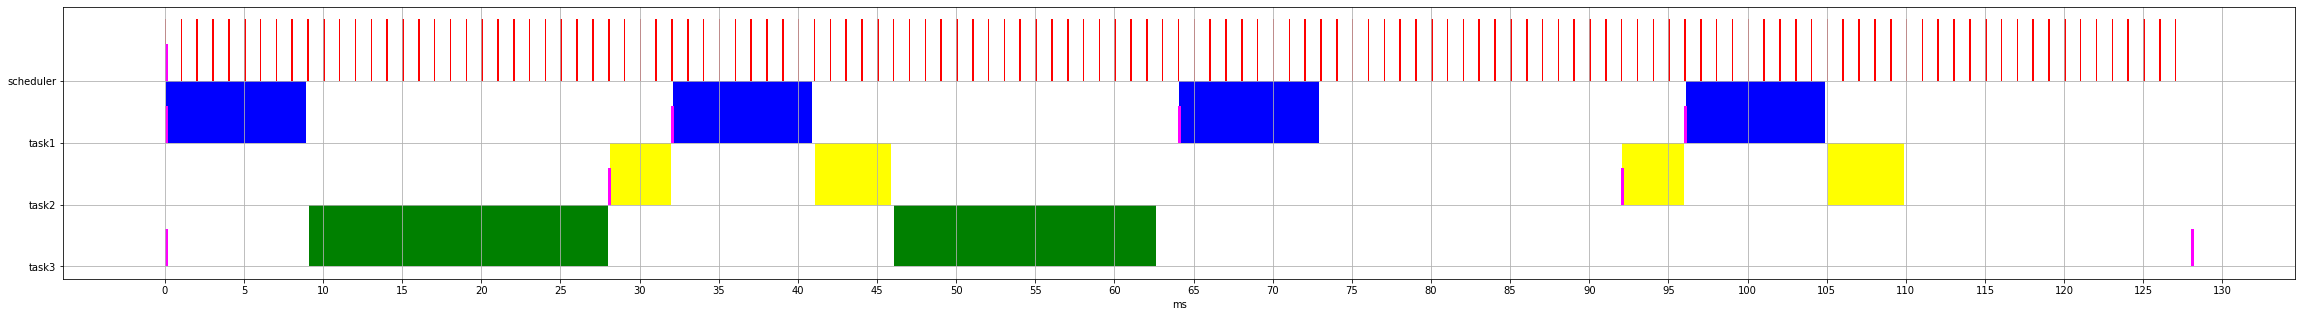

In [ ]:
evaluate_exc("1.4", exc1_4, create_tasks)

#1.5

In [ ]:
def create_tasks_no_C_scheduler():
  task1, task2, task3, scheduler = create_tasks(verbose=False)
  scheduler["C"] = 0
  print(f'\n{task1["name"]}\t\tT: {task1["T"]}\tC: {task1["C"]}\tT0: {task1["T0"]}')
  print(f'{task2["name"]}\t\tT: {task2["T"]}\tC: {task2["C"]}\tT0: {task2["T0"]}')
  print(f'{task3["name"]}\t\tT: {task3["T"]}\tC: {task3["C"]}\tT0: {task3["T0"]}')
  print(f'{scheduler["name"]}\tT: {scheduler["T"]}\tC: {scheduler["C"]}\tT0: {scheduler["T0"]}\n')
  return task1, task2, task3, scheduler

Evaluating excercise: 1.5_1.1

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler [(0, 0), (1, 1), (2, 2), (3, 3)] ... [(124, 124), (125, 125), (126, 126), (127, 127)]
task1 [(0, 8), (32, 40), (64, 72), (96, 104)]
task2 [(28, 32), (40, 44), (92, 96), (104, 108)]
task3 [(8, 28), (44, 56)]
CPU idle times (start (ms), end (ms), duration (ms)): [(56, 57, 1), (57, 58, 1), (58, 59, 1), (59, 60, 1), (60, 61, 1), (61, 62, 1), (62, 63, 1), (63, 64, 1), (72, 73, 1), (73, 74, 1), (74, 75, 1), (75, 76, 1), (76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (108, 109, 1), (109, 110, 1), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (114, 115, 1), (115, 116, 1), (116, 117, 1), (117, 118, 1), (118, 119, 1), (119, 

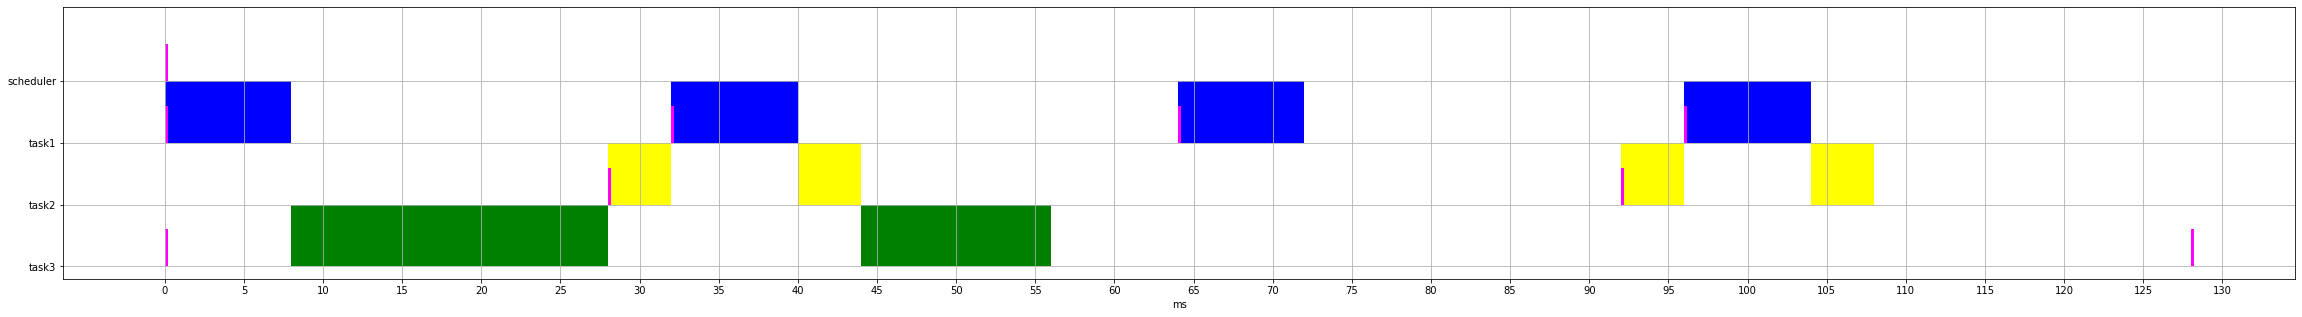

In [ ]:
# 1.1
evaluate_exc("1.5_1.1", exc1_1, create_tasks_no_C_scheduler)

Evaluating excercise: 1.5_1.2

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler [(0, 0), (8, 8), (28, 28), (32, 32)] ... [(64, 64), (92, 92), (96, 96), (104, 104)]
task1 [(0, 8), (32, 40), (64, 72), (96, 104)]
task2 [(28, 32), (40, 44), (92, 96), (104, 108)]
task3 [(8, 28), (44, 56)]
CPU idle times (start (ms), end (ms), duration (ms)): [(56, 57, 1), (57, 58, 1), (58, 59, 1), (59, 60, 1), (60, 61, 1), (61, 62, 1), (62, 63, 1), (63, 64, 1), (72, 73, 1), (73, 74, 1), (74, 75, 1), (75, 76, 1), (76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (108, 109, 1), (109, 110, 1), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (114, 115, 1), (115, 116, 1), (116, 117, 1), (117, 118, 1), (118, 119, 1), (119, 12

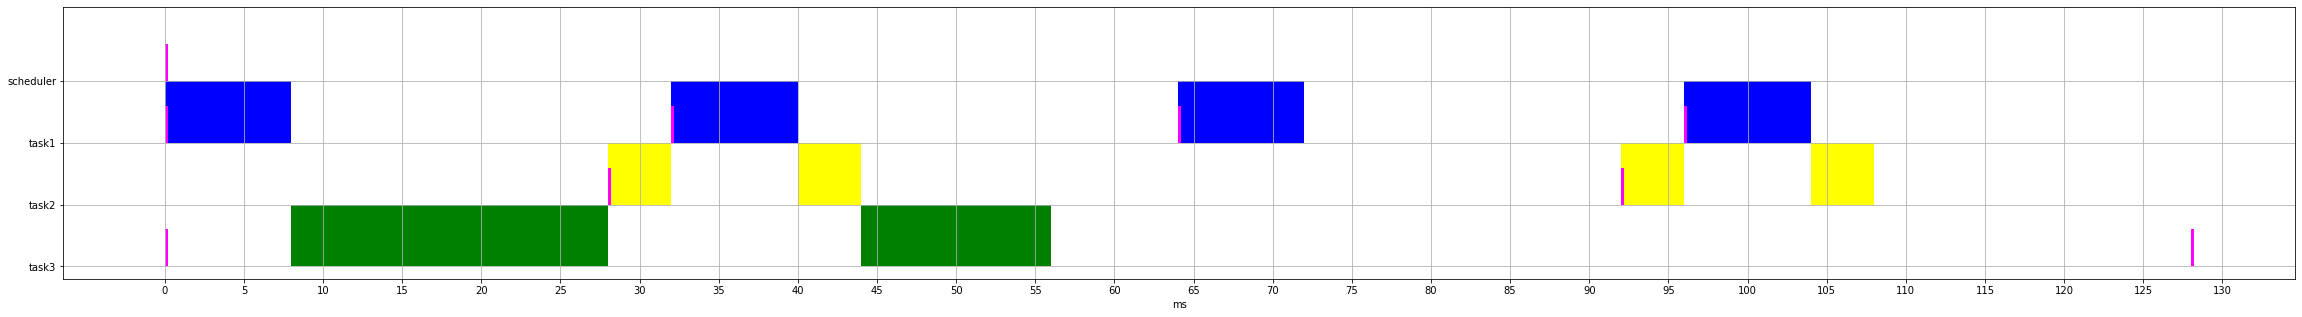

In [ ]:
# 1.2
evaluate_exc("1.5_1.2", exc1_2, create_tasks_no_C_scheduler)

In [ ]:
# 1.3
evaluate_exc_simple("1.5_1.3", exc1_3, create_tasks_no_C_scheduler)

Evaluating excercise: 1.5_1.3

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0	T0: 0


R^(n)	I	C	R^(n+1)
0	0	32	32
32	16	32	48
48	24	32	56
56	24	32	56
Worst case response time of task3: 56(ms)


Evaluating excercise: 1.5_1.4

task1		T: 32	C: 8	T0: 0
task2		T: 64	C: 8	T0: 28
task3		T: 128	C: 32	T0: 0
scheduler	T: 1	C: 0	T0: 0

Found scheduling for repeating sequence with period 128(ms)
scheduler [(0, 0), (1, 1), (2, 2), (3, 3)] ... [(124, 124), (125, 125), (126, 126), (127, 127)]
task1 [(0, 8), (32, 40), (64, 72), (96, 104)]
task2 [(28, 32), (40, 44), (92, 96), (104, 108)]
task3 [(8, 28), (44, 56)]
CPU idle times (start (ms), end (ms), duration (ms)): [(56, 57, 1), (57, 58, 1), (58, 59, 1), (59, 60, 1), (60, 61, 1), (61, 62, 1), (62, 63, 1), (63, 64, 1), (72, 73, 1), (73, 74, 1), (74, 75, 1), (75, 76, 1), (76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (108, 109, 1), (109, 110, 1), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (114, 115, 1), (115, 116, 1), (116, 117, 1), (117, 118, 1), (118, 119, 1), (119, 

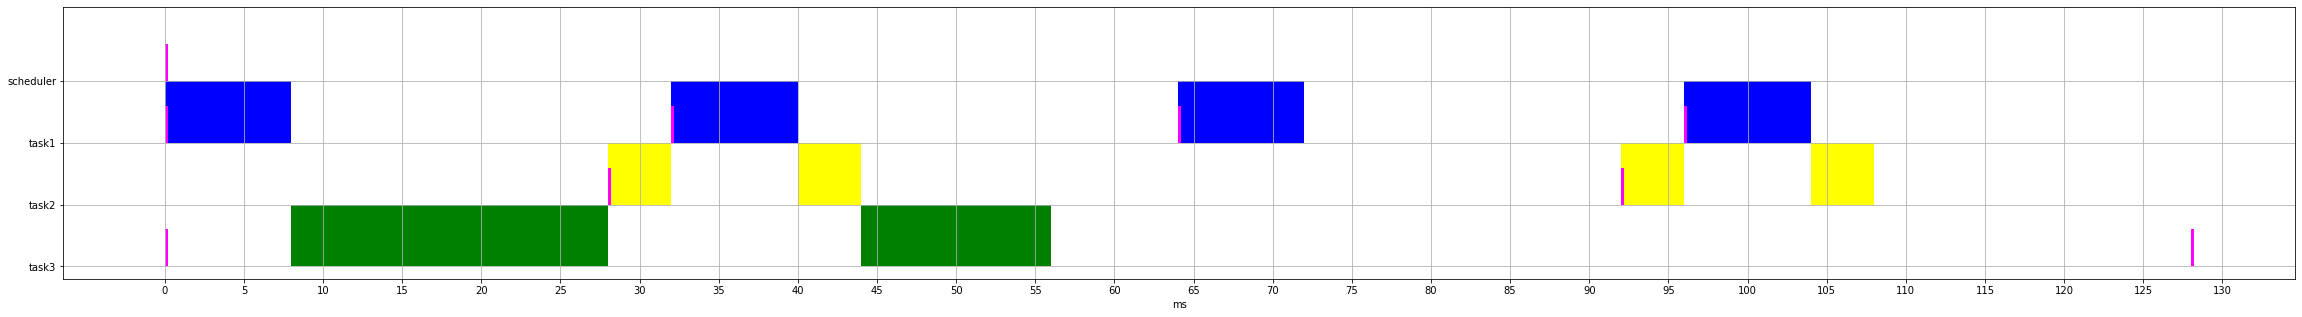

In [ ]:
# 1.4
evaluate_exc("1.5_1.4", exc1_4, create_tasks_no_C_scheduler)

#1.6

###RM Server task:

CPU utilization is 8/32+8/64+32/128=5/8 => We can get a server with harmonic period T in relation to the other tasks.

Let Ts := 8ms and Cs := 3ms

This way the CPU utilization will be exactly 1, but because of the harmonic relation of the periods this is a necessary and sufficient condition of a scheduling.

In [ ]:
def create_tasks_RM_server():
  task1, task2, task3, _ = create_tasks(verbose=False)
  server = {
      "T": 8,
      "C": 3,
      "T0": 0,
      "priority": 0,
      "done": False,
      "left": 3,
      "name": 'server',
      "arrivals": [0],
      "start_times": [],
      "end_times": []
  }
  print(f'{server["name"]}\tT: {server["T"]}\tC: {server["C"]}\tT0: {server["T0"]}')
  print(f'{task1["name"]}\tT: {task1["T"]}\tC: {task1["C"]}\tT0: {task1["T0"]}')
  print(f'{task2["name"]}\tT: {task2["T"]}\tC: {task2["C"]}\tT0: {task2["T0"]}')
  print(f'{task3["name"]}\tT: {task3["T"]}\tC: {task3["C"]}\tT0: {task3["T0"]}')
  return task1, task2, task3, server

In [ ]:
create_tasks_RM_server();

server	T: 8	C: 3	T0: 0
task1	T: 32	C: 8	T0: 0
task2	T: 64	C: 8	T0: 28
task3	T: 128	C: 32	T0: 0


In [ ]:
def exc1_6(task1, task2, task3, server):
  current_task = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"], server["T"]])
  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3, server]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"]:
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)
   
    curr_time = ms
    time_to_execute = 1
    # run one of the tasks and update 
    ran_task = False
    for task in [server, task1, task2, task3]:
      if not task["done"]:
        task_left = task["left"]
        if current_task != task["name"]:
          task["start_times"].append(curr_time)
          for last_task in [task1, task2, task3]:
            if last_task["name"] == current_task:
              last_task["end_times"].append(ms)
              break
          current_task = task["name"]
        
        task["left"] = round(task_left - time_to_execute, 1)
        if task["left"] < epsilon:
          task["done"] = True
          task["left"] = task["C"]
          task["end_times"].append(round(curr_time + task_left, 1))
          current_task = None
          if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
            unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
            unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
        
        scheduling.append(
        [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
        )
        ran_task = True
        
        break
      
    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))

  return interval_end, server, task1, task2, task3, unused_time, unused_times

Evaluating excercise: 1.6
server	T: 8	C: 3	T0: 0
task1	T: 32	C: 8	T0: 0
task2	T: 64	C: 8	T0: 28
task3	T: 128	C: 32	T0: 0
Found scheduling for repeating sequence with period 128(ms)
server (0, 3) (8, 11) (16, 19) (24, 27) (32, 35) (40, 43) (48, 51) (56, 59) (64, 67) (72, 75) (80, 83) (88, 91) (96, 99) (104, 107) (112, 115) (120, 123)
task1 [(3, 8), (11, 14), (35, 40), (43, 46), (67, 72), (75, 78), (99, 104), (107, 110)]
task2 [(28, 32), (46, 48), (51, 53), (92, 96), (110, 112), (115, 117)]
task3 [(14, 16), (19, 24), (27, 28), (53, 56), (59, 64), (78, 80), (83, 88), (91, 92), (117, 120), (123, 128)]
CPU idle times (start (ms), end (ms), duration (ms)): []
Total idle time: 0(ms)
CPU utilization: 1.0


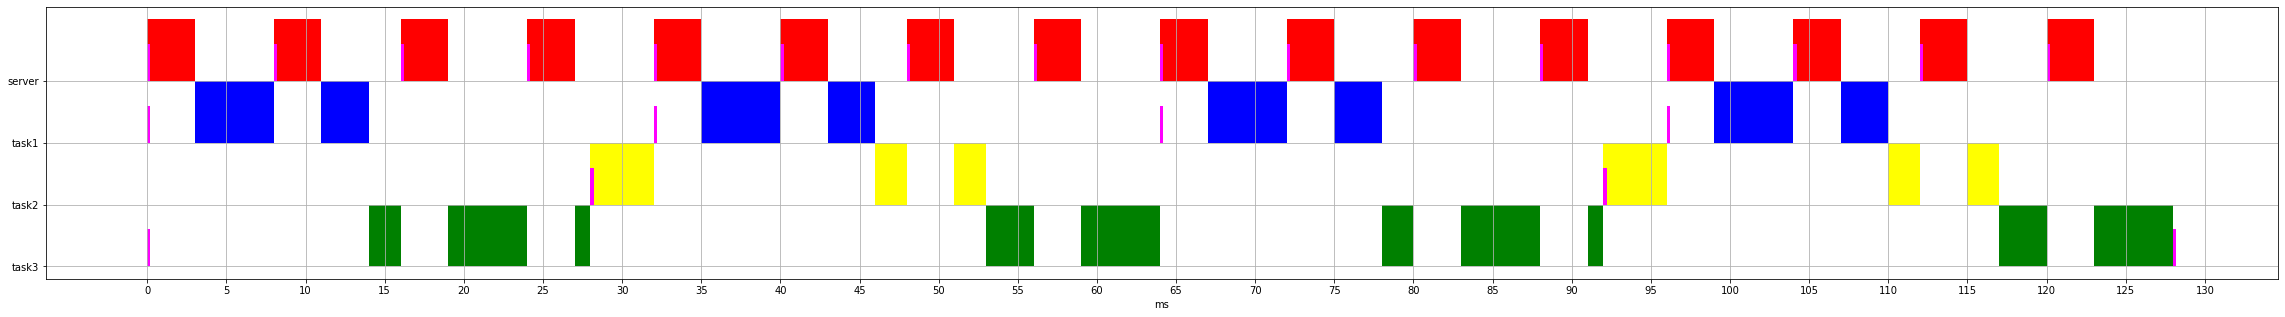

In [ ]:
evaluate_exc("1.6", exc1_6, create_tasks_RM_server, constant_scheduler=False)

#1.7

In [ ]:
def show_scheduling_aper(SHOW_PLOTS, fig_name, task1, task2, task3, server, aper1, aper2, aper3, deadlines=[]):
  fig, ax = plt.subplots()
  fig.set_size_inches(40, 5)
  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task1["start_times"], task1["end_times"])], (10, 5), facecolors='blue')
  ax.broken_barh([(a, .2) for a in task1["arrivals"] ], (10, 3), facecolors='magenta')

  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task2["start_times"], task2["end_times"])], (5, 5), facecolors='yellow')
  ax.broken_barh([(a, .2) for a in task2["arrivals"] ], (5, 3), facecolors='magenta')

  ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task3["start_times"], task3["end_times"])], (0, 5), facecolors='green')
  ax.broken_barh([(a, .2) for a in task3["arrivals"] ], (0, 3), facecolors='magenta')

  for aper, color, i in zip([aper1, aper2, aper3], ["#ff0000", "#990000", "#cc0000" ], range(3)):
    ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(aper["start_times"], aper["end_times"])], (15, 5), facecolors=color)
    if len(deadlines):
      ax.broken_barh([(deadlines[i], .3)], (15, 3.5), facecolors=color)
    ax.broken_barh([(aper["T0"], .3)], (15, 3.5), facecolors='yellow')
  ax.broken_barh([(a, .2) for a in server["arrivals"] ], (15, 3), facecolors='magenta')

  ax.set_xlabel('ms')
  ax.set_xticks([e for e in range(0, 131, 5)])
  ax.set_yticks([0, 5, 10, 15])
  ax.set_yticklabels([task3['name'], task2['name'], task1['name'], server['name']])
  ax.grid(True)
  if SHOW_PLOTS:
    plt.show()
  else:
    plt.savefig(f"figure_{fig_name}.png", dpi=300)

In [ ]:
 def create_tasks_plus_aperiodic():
  task1, task2, task3, _ = create_tasks(verbose=False)
  server = {
      "T": 8,
      "C": 3,
      "T0": 0,
      "priority": 0,
      "done": False,
      "left": 3,
      "name": 'server',
      "arrivals": [0],
      "start_times": [],
      "end_times": []
  }
  aperiodic1 = {
      "T0": p1,
      "C": p1,
      "left": p1,
      "name": 'aperiodic1',
      "arrivals": [],
      "start_times": [],
      "end_times": []
  }
  aperiodic2 = {
      "T0": (p2+1)*p1,
      "C": p1,
      "left": p1,
      "name": 'aperiodic2',
      "arrivals": [],
      "start_times": [],
      "end_times": []
  }
  aperiodic3 = {
      "T0": (p3+1)*p1,
      "C": p1,
      "left": p1,
      "name": 'aperiodic3',
      "arrivals": [],
      "start_times": [],
      "end_times": []
  }
  print(f'\n{server["name"]}\tT: {server["T"]}\tC: {server["C"]}\tT0: {server["T0"]}')
  print(f'{task1["name"]}\tT: {task1["T"]}\tC: {task1["C"]}\tT0: {task1["T0"]}')
  print(f'{task2["name"]}\tT: {task2["T"]}\tC: {task2["C"]}\tT0: {task2["T0"]}')
  print(f'{task3["name"]}\tT: {task3["T"]}\tC: {task3["C"]}\tT0: {task3["T0"]}')
  print(f'{aperiodic1["name"]}\tC: {aperiodic1["C"]}\tT0: {aperiodic1["T0"]}')
  print(f'{aperiodic2["name"]}\tC: {aperiodic2["C"]}\tT0: {aperiodic2["T0"]}')
  print(f'{aperiodic3["name"]}\tC: {aperiodic3["C"]}\tT0: {aperiodic3["T0"]}\n')

  return task1, task2, task3, server, aperiodic1, aperiodic2, aperiodic3

In [ ]:
def evaluate_exc_aper(exc_num, exc, create_tasks):
  print(f'Evaluating excercise: {exc_num}')
  interval_end, server, task1, task2, task3, unused_time, unused_times, static_aper_queue = exc(*create_tasks())
  print(f'Found scheduling for repeating sequence with period {interval_end}(ms)')

  for task in [server, task1, task2, task3]:
    print(task["name"], [(round(s, 1), round(e, 1)) for s,e in zip(task["start_times"], task["end_times"])])
  for a_task in static_aper_queue:
    print(a_task["name"], [(round(s, 1), round(e, 1)) for s,e in zip(a_task["start_times"], a_task["end_times"])])
  show_scheduling_aper(SHOW_PLOTS, exc_num, task1, task2, task3, server, *static_aper_queue)
  print(f'CPU idle times (start (ms), end (ms), duration (ms)): {unused_times}')
  print(f'Total idle time: {unused_time}(ms)')
  print(f'CPU utilization: {1- (unused_time / interval_end)}')

In [ ]:
def exc1_7(task1, task2, task3, server, aperiodic1, aperiodic2, aperiodic3):
  current_task = None
  current_aper = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  aperiodic_queue = []
  static_aperiodic_queue = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"], server["T"]])
  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3, server]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"] and task["name"] != "server":
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)
    
    # receive aperiodic tasks
    for a in [aperiodic1, aperiodic2, aperiodic3]:
      if ms == a["T0"]:
        aperiodic_queue.append(a)
   
    curr_time = ms
    time_to_execute = 1

    # run one of the tasks and update 
    ran_task = False
    for task in [server, task1, task2, task3]:
      if not task["done"]:
        if task["name"] == server["name"]:
          if len(aperiodic_queue):
            aper = aperiodic_queue[0]
            task_left = task["left"]
            aper_left = aper["left"]
            if current_task != task["name"]:
              task["start_times"].append(curr_time)
              aper["start_times"].append(curr_time)
              for last_task in [task1, task2, task3]:
                if last_task["name"] == current_task:
                  last_task["end_times"].append(ms)
                  break
              current_task = task["name"]
              current_aper = aper["name"]
            elif current_aper != aper["name"]:
              aper["start_times"].append(curr_time)
              current_aper = aper["name"]
            
            task["left"] = round(task_left - time_to_execute, 1)
            aper["left"] = round(aper_left - time_to_execute, 1)
            
            if aper["left"] < epsilon or task["left"] < epsilon:
              aper["end_times"].append(round(curr_time + 1, 1))
              if aper["left"] < epsilon:
                static_aperiodic_queue.append(aper)
                aperiodic_queue.pop(0)
                current_aper = None

            if not len(aperiodic_queue):
              task["end_times"].append(round(curr_time + 1, 1))
              current_task = None
              if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
                unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
                unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))

            if task["left"] < epsilon:
              task["done"] = True
              task["left"] = task["C"]
              task["end_times"].append(round(curr_time + 1, 1))
              current_task = None
              if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
                unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
                unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
            
            scheduling.append(
            [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
            )
            ran_task = True
            break

        else:
          task_left = task["left"]
          if current_task != task["name"]:
            task["start_times"].append(curr_time)
            for last_task in [task1, task2, task3]:
              if last_task["name"] == current_task:
                last_task["end_times"].append(ms)
                break
            current_task = task["name"]
          
          task["left"] = round(task_left - time_to_execute, 1)
          if task["left"] < epsilon:
            task["done"] = True
            task["left"] = task["C"]
            task["end_times"].append(round(curr_time + task_left, 1))
            current_task = None
            if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
              unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
              unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
          
          scheduling.append(
          [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
          )
          ran_task = True
          break
      
    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))

  return interval_end, server, task1, task2, task3, unused_time, unused_times, static_aperiodic_queue

Evaluating excercise: 1.7

server	T: 8	C: 3	T0: 0
task1	T: 32	C: 8	T0: 0
task2	T: 64	C: 8	T0: 28
task3	T: 128	C: 32	T0: 0
aperiodic1	C: 4	T0: 4
aperiodic2	C: 4	T0: 32
aperiodic3	C: 4	T0: 4

Found scheduling for repeating sequence with period 128(ms)
server [(4, 7), (8, 11), (16, 18), (32, 35), (40, 41)]
task1 [(0, 4), (7, 8), (11, 14), (35, 40), (41, 44), (64, 72), (96, 104)]
task2 [(28, 32), (44, 48), (92, 96), (104, 108)]
task3 [(14, 16), (18, 28), (48, 64), (72, 76)]
aperiodic1 [(4, 7), (8, 9)]
aperiodic3 [(9, 11), (16, 18)]
aperiodic2 [(32, 35), (40, 41)]
CPU idle times (start (ms), end (ms), duration (ms)): [(76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (108, 109, 1), (109, 110, 1), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (114, 115, 1), (115, 116, 1), (116, 117, 1), (117, 118, 1), (118, 119, 1), (119, 

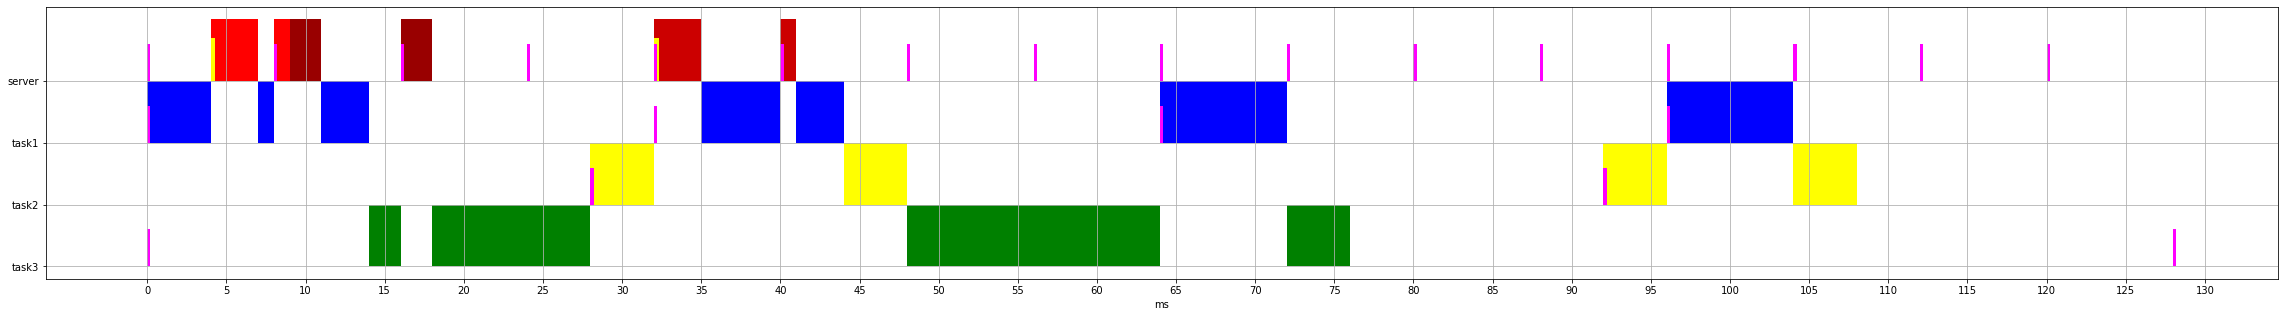

In [ ]:
evaluate_exc_aper("1.7", exc1_7, create_tasks_plus_aperiodic)

#1.8

In [ ]:
def evaluate_exc_aper_TBS(exc_num, exc, create_tasks):
  print(f'Evaluating excercise: {exc_num}')
  interval_end, server, task1, task2, task3, unused_time, unused_times, aper_queue, mu = exc(*create_tasks())
  print(f'Found scheduling for repeating sequence with period {interval_end}(ms)')
  print(f'TBS server bandwidth: {mu}')
  for task in [task1, task2, task3]:
    print(task["name"], [(round(s, 1), round(e, 1)) for s,e in zip(task["start_times"], task["end_times"])])
  for deadline, a_task in aper_queue:
    print(f'{a_task["name"]} {[(round(s, 1), round(e, 1)) for s,e in zip(a_task["start_times"], a_task["end_times"])]} deadline: {round(deadline, 2)}')
  show_scheduling_aper(SHOW_PLOTS, exc_num, task1, task2, task3, server, *[a for _, a in aper_queue], [d for d, _ in aper_queue])
  print(f'CPU idle times (start (ms), end (ms), duration (ms)): {unused_times}')
  print(f'Total idle time: {unused_time}(ms)')
  print(f'CPU utilization: {1- (unused_time / interval_end)}')

In [ ]:
def exc1_8(task1, task2, task3, server, aperiodic1, aperiodic2, aperiodic3):
  current_task = None
  epsilon = 1e-4
  scheduling = []
  unused_time = 0
  unused_times = []
  task_queue = []
  aperiodic_queue = []
  interval_end = np.lcm.reduce([task1["T"], task2["T"], task3["T"], server["T"]])
  mu_S = 1 - sum([task_k["C"]/task_k["T"] for task_k in [task1, task2, task3]])

  for task in [task1, task2, task3]:
    if task["T0"] == 0:
      task_deadline = task["T"]
      task_queue.append((task_deadline, task))

  for ms in range(0,interval_end):
    # update doneness based on arrival times
    if not ms == 0:
      for task in [task1, task2, task3]:
        if  ms % task["T"] == task["T0"]:
          if not task["done"]:
            print('Cannot be scheduled!')
          else:
            task["done"] = False
            task["left"] = task["C"]
            task["arrivals"].append(ms)
            task_deadline = ms + task["T"]
            task_queue.append((task_deadline, task))

      # receive aperiodic tasks
    for a in [aperiodic1, aperiodic2, aperiodic3]:
      if ms == a["T0"]:
        d_a_minus_1 = aperiodic_queue[-1][0] if len(aperiodic_queue) else -1
        d_a = max(ms, d_a_minus_1) + (a["C"] / mu_S)
        aperiodic_queue.append((d_a, a))
        task_queue.append((d_a, a))

    
    curr_time = ms
    time_to_execute = 1

    ran_task = False
    if len(task_queue):
      task = get_smallest(task_queue, current_task)[1]
      if current_task != task["name"]:
        task["start_times"].append(curr_time)
        for last_task in [task1, task2, task3]:
          if last_task["name"] == current_task:
            last_task["end_times"].append(ms)
            break
        current_task = task["name"]

      task_left = task["left"]
      task["left"] = round(task_left - time_to_execute, 1)
      if task["left"] < epsilon:
        task["done"] = True
        task["left"] = task["C"]
        task["end_times"].append(round(curr_time + task_left, 1))
        delete_task_from(task_queue, current_task)
        current_task = None
        if abs(round(ms + 1 - task["end_times"][-1], 1)) > epsilon:
          unused_time = round(unused_time + ms + 1 - task["end_times"][-1], 1)
          unused_times.append((task["end_times"][-1], ms+1, round(ms + 1 - task["end_times"][-1], 1)))
      
      scheduling.append(
      [curr_time, ms+1 if task["left"] > epsilon else task["end_times"][-1], task["name"]]
      )
      ran_task = True

    if not ran_task:
      unused_time = round(unused_time + time_to_execute, 1)
      unused_times.append((curr_time, ms+1, time_to_execute))


  return interval_end, server, task1, task2, task3, unused_time, unused_times, aperiodic_queue, mu_S

Evaluating excercise: 1.8

server	T: 8	C: 3	T0: 0
task1	T: 32	C: 8	T0: 0
task2	T: 64	C: 8	T0: 28
task3	T: 128	C: 32	T0: 0
aperiodic1	C: 4	T0: 4
aperiodic2	C: 4	T0: 32
aperiodic3	C: 4	T0: 4

Found scheduling for repeating sequence with period 128(ms)
TBS server bandwidth: 0.375
task1 [(0, 4), (12, 16), (36, 44), (64, 72), (96, 104)]
task2 [(28, 32), (44, 48), (92, 96), (104, 108)]
task3 [(16, 28), (48, 64), (72, 76)]
aperiodic1 [(4, 8)] deadline: 14.67
aperiodic3 [(8, 12)] deadline: 25.33
aperiodic2 [(32, 36)] deadline: 42.67
CPU idle times (start (ms), end (ms), duration (ms)): [(76, 77, 1), (77, 78, 1), (78, 79, 1), (79, 80, 1), (80, 81, 1), (81, 82, 1), (82, 83, 1), (83, 84, 1), (84, 85, 1), (85, 86, 1), (86, 87, 1), (87, 88, 1), (88, 89, 1), (89, 90, 1), (90, 91, 1), (91, 92, 1), (108, 109, 1), (109, 110, 1), (110, 111, 1), (111, 112, 1), (112, 113, 1), (113, 114, 1), (114, 115, 1), (115, 116, 1), (116, 117, 1), (117, 118, 1), (118, 119, 1), (119, 120, 1), (120, 121, 1), (121, 122, 

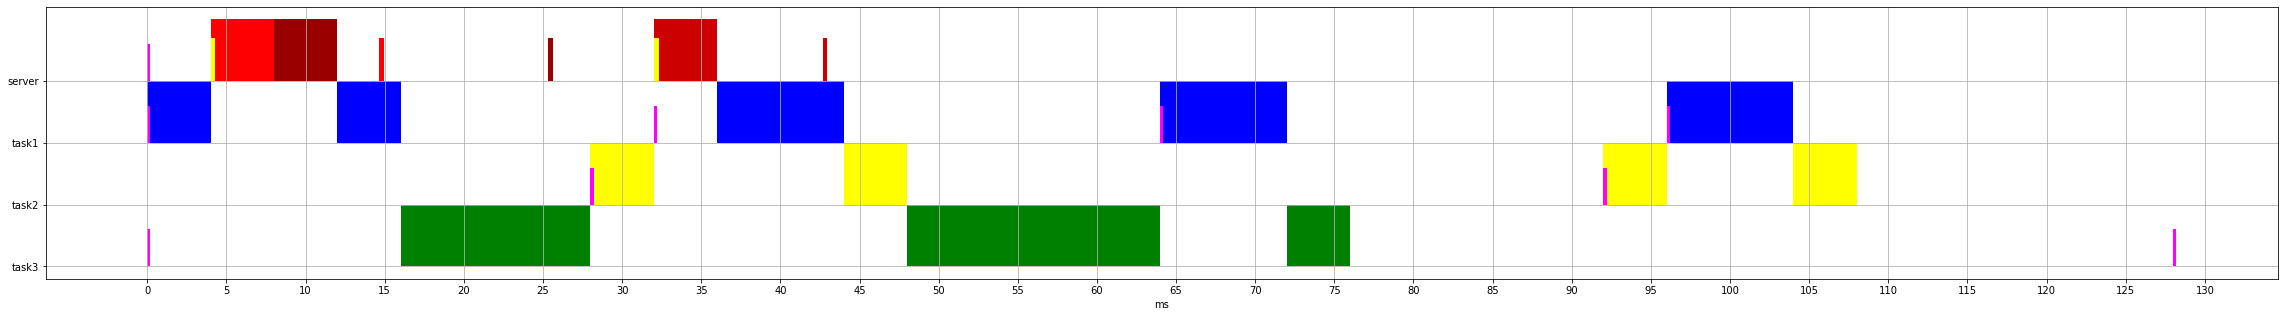

In [ ]:
evaluate_exc_aper_TBS("1.8", exc1_8, create_tasks_plus_aperiodic)

2

In [ ]:
print(2.5*1e-6)

2.4999999999999998e-06


In [ ]:
a, b, c, d, e, f = 40, 2.5*1e-6, 1, 3, 5, 80000

In [ ]:
task1 = {
    "T0": 0,
    "D": c,
    "N": 100000
}
task2 = {
    "T0": c,
    "D": d,
    "N": 100000
}
task3 = {
    "T0": d,
    "D": e,
    "N": f
}

print(f)
  

80000


2.3

In [ ]:
Tasks = {
    "start": [0, 1, 3], 
    "end": [0.5, 1.5, 3.4],
    "power": 7
}

Idles = {
    "start": [0.5], 
    "end": [1],
    "power": 5
}

Sleep = {
    "start": [1.5, 3.4], 
    "end": [3, 5],
    "power": 2
}

In [ ]:
def show_scheduling_power(SHOW_PLOTS, fig_name, tasks, idles, sleeps):
  fig, ax = plt.subplots()
  
  for task, color in zip([tasks, idles, sleeps], ["blue", "green", "red" ]):
    ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task["start"], task["end"])], (-0.1, task["power"]), facecolors=color)
  

  ax.set_xlabel('ms')
  ax.set_xticks([round(e/2, 1) if e != 7  else 3.4 for e in range(0, 12)])
  ax.set_ylabel('mW')
  ax.set_yticks([2, 5, 7])
  ax.set_yticklabels([0, 40.3125, 60])
  ax.grid(True)
  if SHOW_PLOTS:
    plt.show()
  else:
    plt.savefig(f"figure_{fig_name}.png", dpi=300)

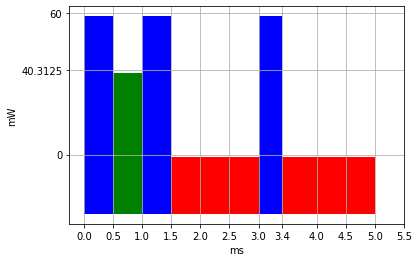

In [ ]:
show_scheduling_power(SHOW_PLOTS, "2.3", Tasks, Idles, Sleep)

2.4

In [ ]:
Tasks = {
    "start": [1, 3], 
    "end": [1.5, 3.4],
    "power": 7
}

Low_pow = {
    "start": [0], 
    "end": [1],
    "power": 5
}

Sleep = {
    "start": [1.5, 3.4], 
    "end": [3, 5],
    "power": 2
}

In [ ]:
def show_scheduling_power_saver(SHOW_PLOTS, fig_name, tasks, low_pow, sleeps, xlabels):
  fig, ax = plt.subplots()
  
  for task, color in zip([tasks, low_pow, sleeps], ["blue", "#0099ff", "red" ]):
    ax.broken_barh([(round(s, 1), round(e-s, 1)) for s,e in zip(task["start"], task["end"])], (-0.1, task["power"]), facecolors=color)
  

  ax.set_xlabel('ms')
  ax.set_xticks(xlabels)
  ax.set_ylabel('mW')
  ax.set_yticks([2, 5, 7])
  ax.set_yticklabels([0, 42.5, 60])
  ax.grid(True)
  if SHOW_PLOTS:
    plt.show()
  else:
    plt.savefig(f"figure_{fig_name}.png", dpi=300)

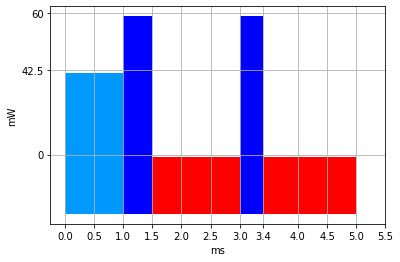

In [ ]:
show_scheduling_power_saver(SHOW_PLOTS, "2.4", Tasks, Low_pow, Sleep, [round(e/2, 1) if e != 7  else 3.4 for e in range(0, 12)])

2.5

In [ ]:
Tasks = {
    "start": [1, 4.6], 
    "end": [1.5, 5],
    "power": 7
}

Low_pow = {
    "start": [0], 
    "end": [1],
    "power": 5
}

Sleep = {
    "start": [1.5], 
    "end": [4.6],
    "power": 2
}

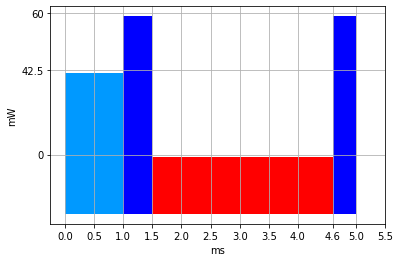

In [ ]:
show_scheduling_power_saver(SHOW_PLOTS, "2.5", Tasks, Low_pow, Sleep, [round(e/2, 1) if e != 9  else 4.6 for e in range(0, 12)])